In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [3]:
def plot_antenna_arr(array):
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(array[:,0], array[:,1],s=5)
    for i, txt in enumerate(range(1,len(array)+1,1)):
        plt.annotate(txt, (array[i,0], array[i,1]))
        plt.xlabel('x [m]')
        plt.ylabel('y [m]')
        x_lim=max(abs(array[:,0]))*1.1
        y_lim=max(abs(array[:,1]))*1.1
        plt.xlim(-x_lim, x_lim)
        plt.ylim(-y_lim, y_lim)
    plt.show()

In [4]:
def y_antenna_arr(n_antenna=5, r=500, alpha=0):
    step = r/n_antenna
    return np.array([ [np.array([(i+1)*step*np.cos(angle/180*np.pi), (i+1)*step*np.sin(angle/180*np.pi)]) for i in range(n_antenna)] for angle in [alpha, alpha+120, alpha+240] ]).reshape((3*n_antenna,2))


In [7]:
def get_baselines(array):
    # Get the baseline for every combination of antennas i-j.
    # Remove the i=j baselines: np.delete(array, list, axis=0) -> delete the rows listed on 'list' from array 'array'. 
    return np.delete(np.array([antenna_i-antenna_j for antenna_i in array for antenna_j in array]), [(len(array)+1)*n for n in range(len(array))], 0)

In [5]:
# Antenna parameters
x_lim = 30000
y_lim = 30000
n_antenna = 3*9
n_baselines = n_antenna*(n_antenna-1)
radius = 30000
alpha = 90-5
#arr = random_antenna_arr(n_antenna, x_lim, y_lim)
#arr = radial_antenna_arr(n_antenna, x_lim, y_lim,radius)
arr = y_antenna_arr(int(n_antenna/3), radius, alpha)

# Get visibilities from matrix multiplication

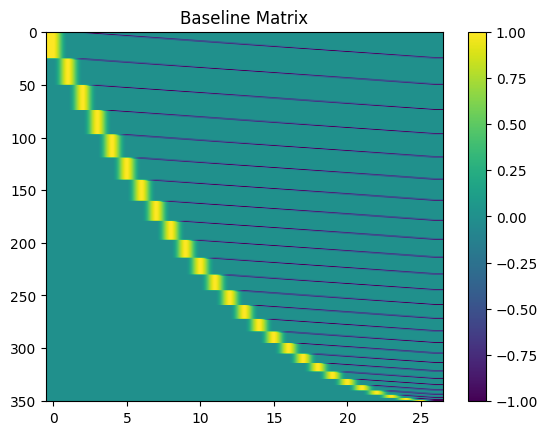

In [6]:
N = n_antenna
# Length of the baseline matrix
L = int(N*(N-1)*0.5)
B = np.zeros((L,N))
for k in range(N-1):
    for i in range(k+1):
        B[L-1-i-int(k*(k+1)/2), N-k-2]=1
        B[L-1-i-int(k*(k+1)/2), N-1-i]=-1


plt.imshow(B,aspect='auto', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Baseline Matrix')
plt.show()

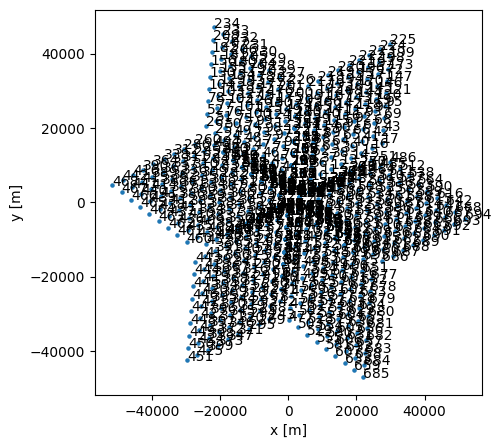

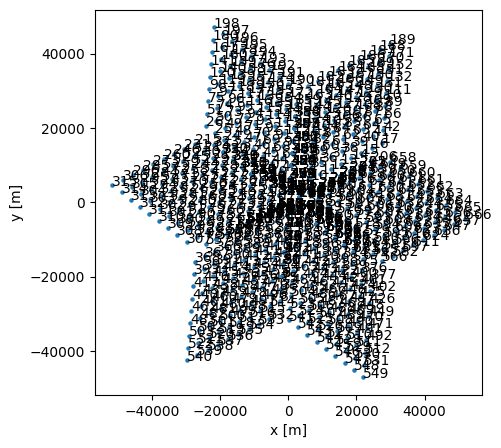

In [9]:
vis_half = B.dot(arr)
vis_full = np.concatenate((vis_half, -1*vis_half), axis=0)
plot_antenna_arr(get_baselines(arr))
plot_antenna_arr(vis_full)

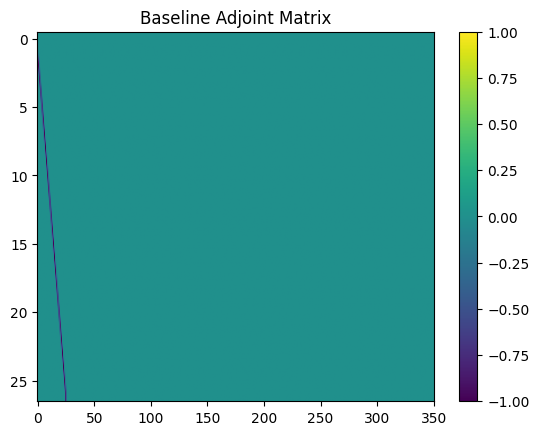

In [10]:
B_inv = np.zeros((N,L))
B_inv[1:N,:N-1] = -np.eye(N-1)

plt.imshow(B_inv,aspect='auto', vmin=-1, vmax=1)
plt.title('Baseline Adjoint Matrix')
plt.colorbar()
plt.show()

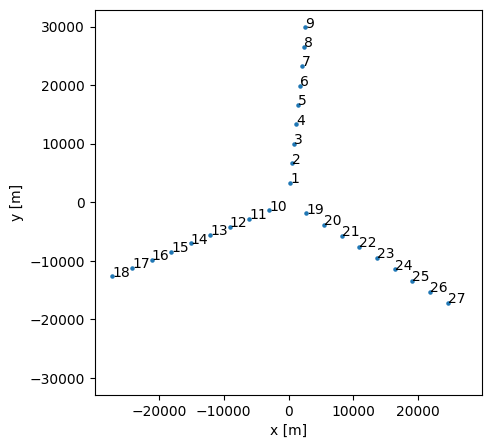

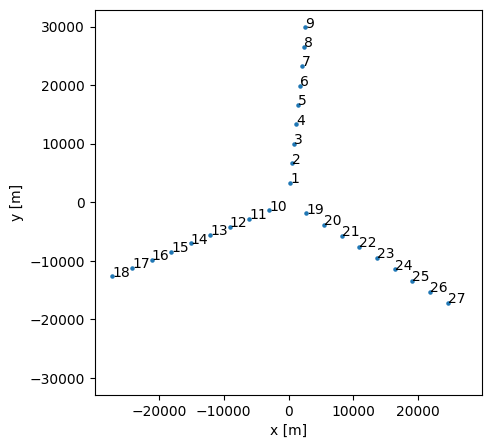

In [11]:
# rnd.shuffle(vis_half)
arr_adj = B_inv.dot(vis_half)
plot_antenna_arr(arr)
plot_antenna_arr(arr_adj+arr[0])


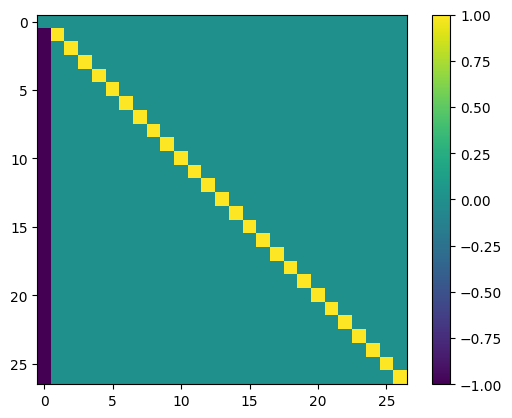

In [12]:
plt.imshow(B_inv.dot(B))
plt.colorbar()
plt.show()

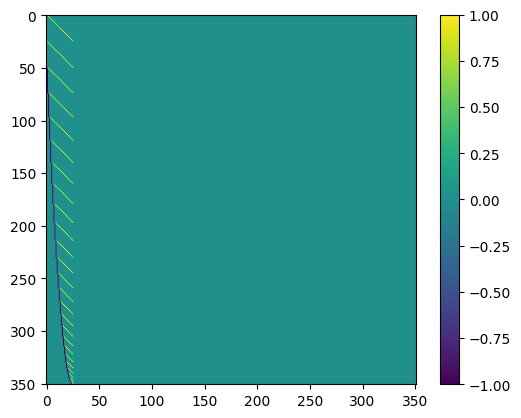

In [13]:
plt.imshow(B.dot(B_inv))
plt.colorbar()
plt.show()